In [ ]:
from google.colab import drive
import os
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [14]:
drive.mount('/gdrive')

Mounted at /gdrive


In [19]:
dir_folderMH = '/gdrive/MyDrive/CS231.L22.KHCL'
dir_baitap = os.path.join(dir_folderMH, 'FeatureMatch')

# Harris

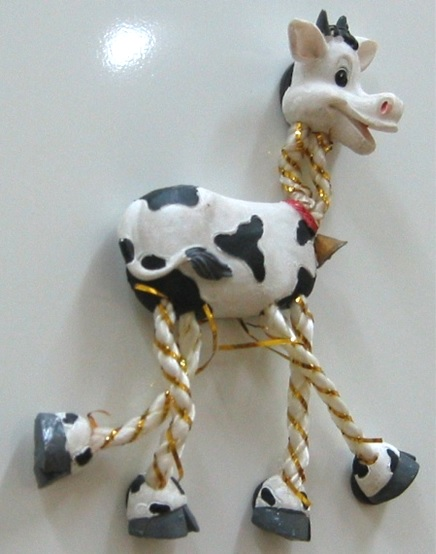

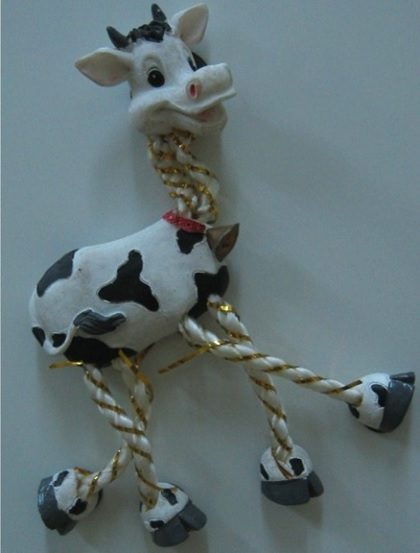

In [29]:
cow1 = os.path.join(dir_baitap, 'cow1.jpg')
img_cow1 = cv.imread(cow1)
cv2_imshow(img_cow1)

cow2 = os.path.join(dir_baitap, 'cow2.jpg')
img_cow2 = cv.imread(cow2)
cv2_imshow(img_cow2)

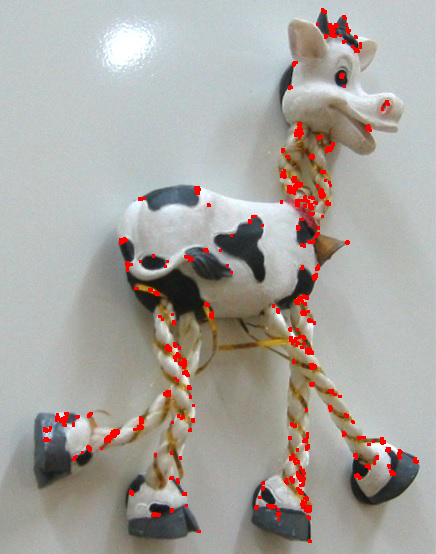

In [30]:
gray = cv.cvtColor(img_cow1,cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img_cow1[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(img_cow1)

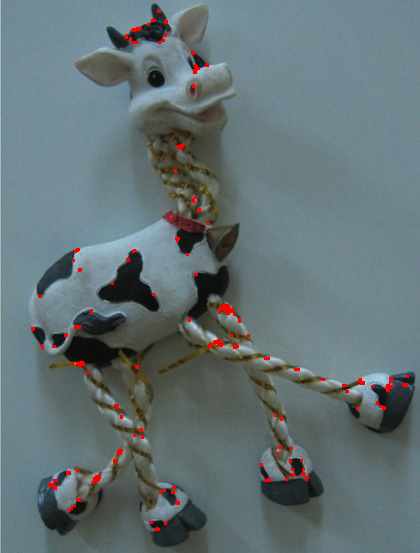

In [31]:
gray2 = cv.cvtColor(img_cow2,cv.COLOR_BGR2GRAY)

gray2 = np.float32(gray2)
dst2 = cv.cornerHarris(gray2,2,3,0.04)

#result is dilated for marking the corners, not important
dst2 = cv.dilate(dst2,None)

# Threshold for an optimal value, it may vary depending on the image.
img_cow2[dst2>0.01*dst2.max()]=[0,0,255]
cv2_imshow(img_cow2)

# Match desciptors 

## graf_img

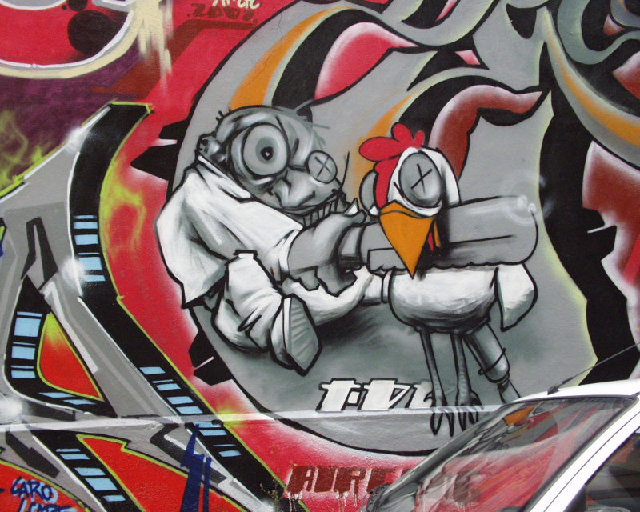

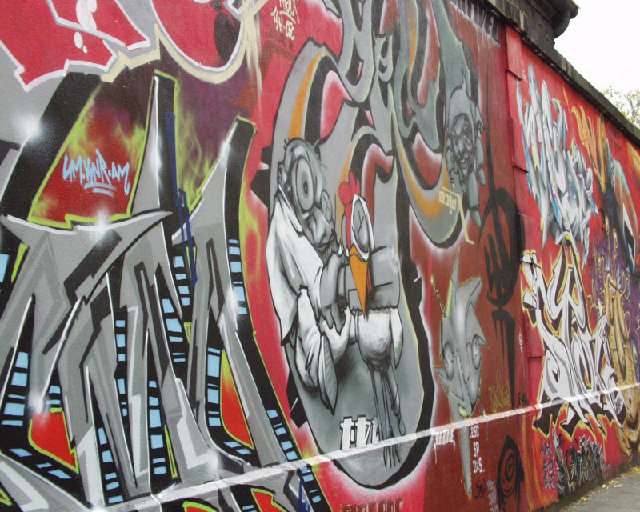

In [42]:
path_graf_img1 = os.path.join(dir_baitap, 'graf_img1.jpg')
graf_img1 = cv.imread(path_graf_img1)
cv2_imshow(graf_img1)

path_graf_img2 = os.path.join(dir_baitap, 'graf_img5.jpg')
graf_img2 = cv.imread(path_graf_img2)
cv2_imshow(graf_img2)

In [43]:
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(graf_img1,None)
kp2, des2 = orb.detectAndCompute(graf_img2,None)

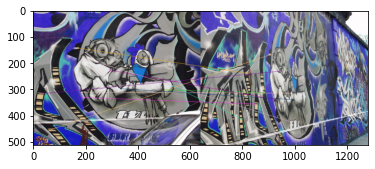

(<matplotlib.image.AxesImage at 0x7fa258e6bf10>, None)

In [44]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(graf_img1,kp1,graf_img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

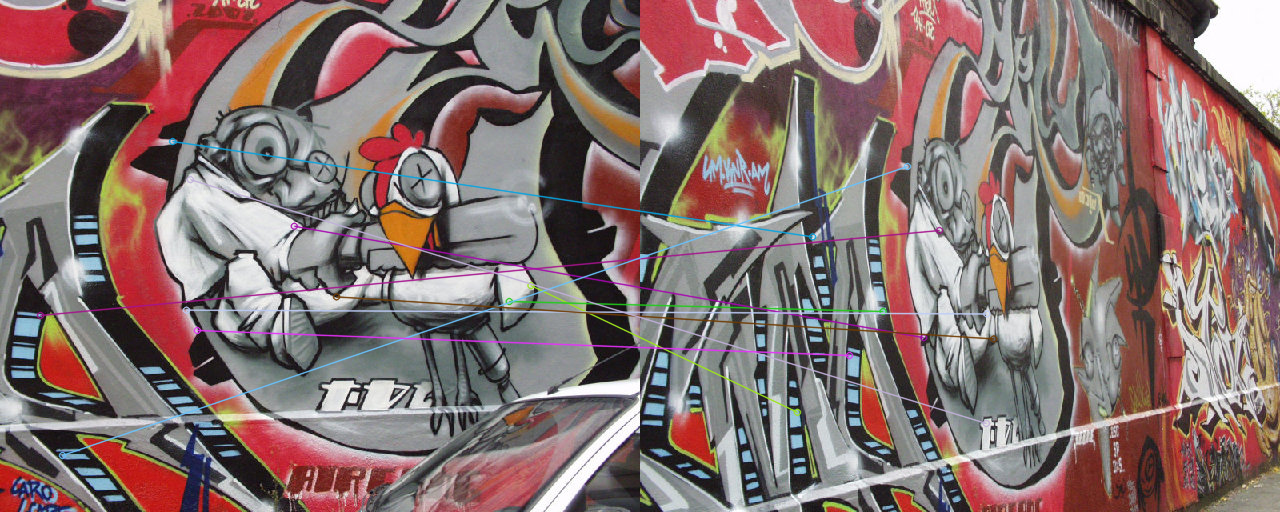

In [45]:
cv2_imshow(img3)

## match image

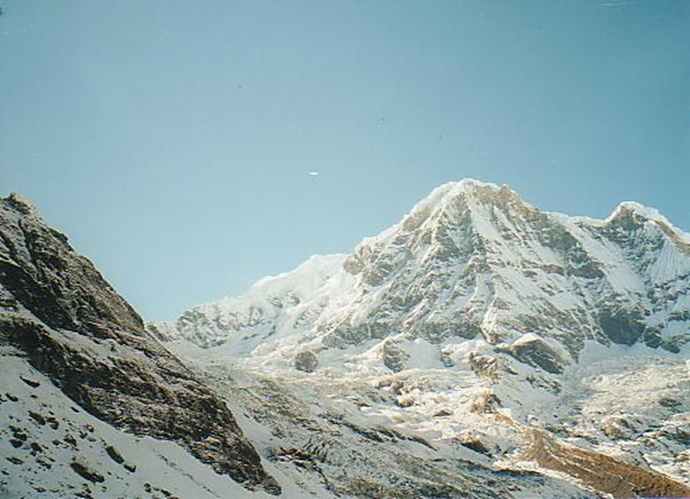

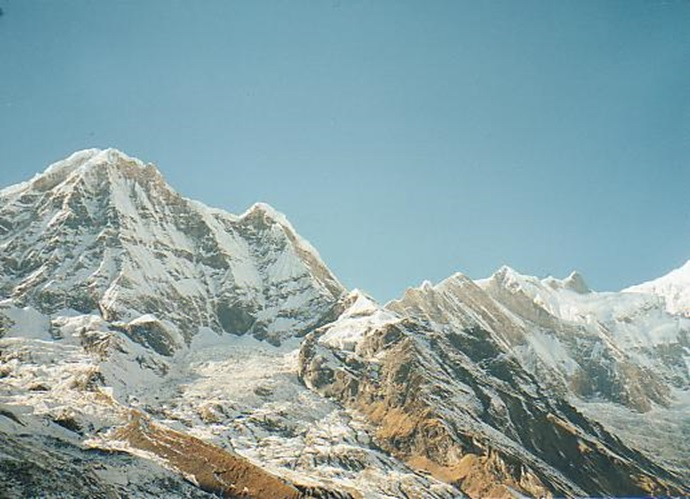

In [46]:
path_match1 = os.path.join(dir_baitap, 'match1.jpg')
match1 = cv.imread(path_match1)
cv2_imshow(match1)

path_match2 = os.path.join(dir_baitap, 'match2.jpg')
match2 = cv.imread(path_match2)
cv2_imshow(match2)

In [47]:
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(match1,None)
kp2, des2 = orb.detectAndCompute(match2,None)

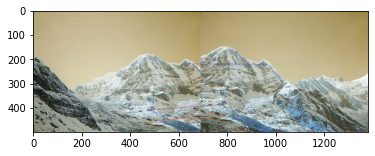

(<matplotlib.image.AxesImage at 0x7fa258e33d90>, None)

In [48]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(match1,kp1,match2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

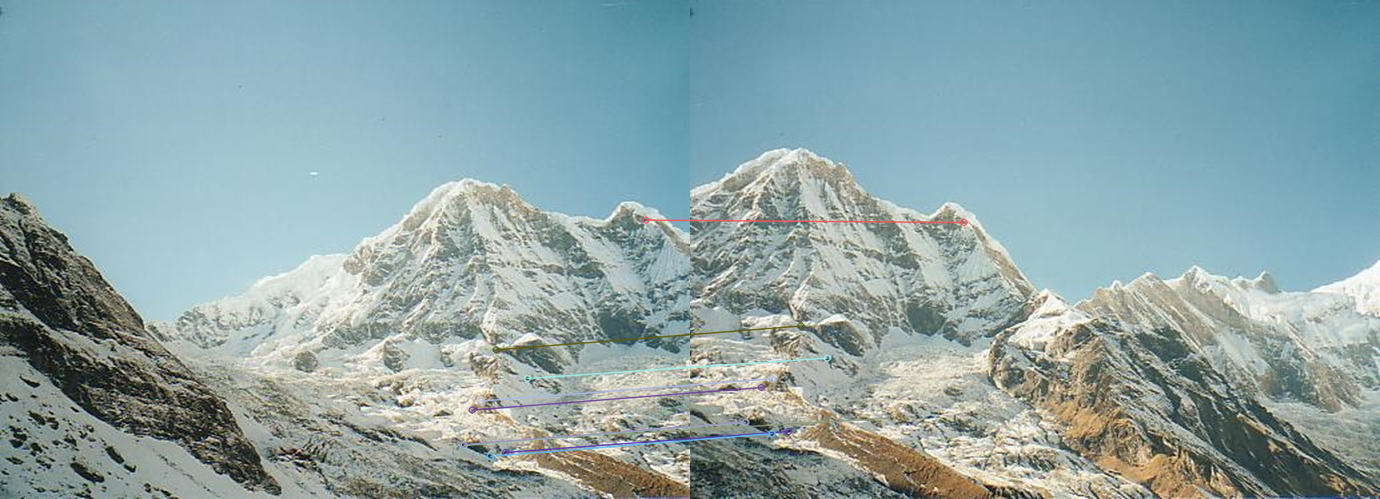

In [49]:
cv2_imshow(img3)